In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
!pip install "gensim==4.2.0"
!pip install "texthero==1.0.5"
!pip install Unidecode
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import texthero as hero

In [ ]:
help(hero)

Help on package texthero:

NAME
    texthero - Texthero: python toolkit for text preprocessing, representation and visualization.

PACKAGE CONTENTS
    __about__
    clustering
    preprocessing
    representation
    statistics
    texthero
    version
    visualization

DATA
    stopwords = <WordListCorpusReader in '/root/nltk_data/corpora/stopword...

VERSION
    1.0.5

FILE
    /usr/local/lib/python3.10/dist-packages/texthero/__init__.py




In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [ ]:
df.shape


(4009, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

URLs        0
Headline    0
Body        0
Label       0
dtype: int64

In [ ]:
X_body = df.iloc[: , 2]

In [ ]:
hero.top_words(df["Body"])


the         96773
to          51193
of          45050
and         44977
a           41920
            ...  
comet3          1
surgeons        1
gif             1
Hybrids         1
52m             1
Name: Body, Length: 55880, dtype: int64

In [ ]:
hero.top_words(df["Body"].pipe(hero.clean))

/usr/local/lib/python3.10/dist-packages/texthero/preprocessing.py:46: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(r"^\d+\s|\s\d+\s|\s\d+$", " ")
/usr/local/lib/python3.10/dist-packages/texthero/preprocessing.py:81: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(pat, '')


said           9521
one            4652
new            4162
would          4088
also           3408
               ... 
youxia            1
sciencevibe       1
768x445           1
landforms         1
52m               1
Name: Body, Length: 45736, dtype: int64

/usr/local/lib/python3.10/dist-packages/texthero/preprocessing.py:46: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(r"^\d+\s|\s\d+\s|\s\d+$", " ")
/usr/local/lib/python3.10/dist-packages/texthero/preprocessing.py:81: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(pat, '')


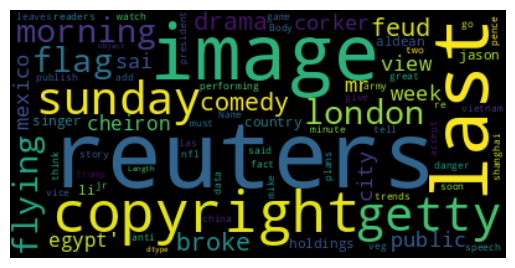

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(df["Body"].pipe(hero.clean))

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df['Body_filtered']=df["Body"].pipe(hero.clean)

/usr/local/lib/python3.10/dist-packages/texthero/preprocessing.py:46: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(r"^\d+\s|\s\d+\s|\s\d+$", " ")
/usr/local/lib/python3.10/dist-packages/texthero/preprocessing.py:81: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(pat, '')


In [ ]:
df['Body_filtered'].shape

(3988,)

In [ ]:
df["Body"].shape

(3988,)

In [ ]:
df['Body_filtered'][255]

'embattled pharmaceutical company sells powerful painkiller fentanyl donated 500 000 campaign opposing pot legalization pro legalization campaign says truly shocked video'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
body = tf.fit_transform(df['Body_filtered'])

In [ ]:
y = df.iloc[: , -1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
X_train_body , X_test_body , y_train_body , y_test_body = train_test_split(body , y ,test_size = 0.2 )
mn_body = ExtraTreesClassifier()
mn_body.fit(X_train_body,y_train_body)
y_pred_body = mn_body.predict(X_test_body)


In [ ]:
print('Model accuracy score: {0:0.4f}'. format(mn_body.score(X_train_body,y_train_body)*100))

Model accuracy score: 99.9373


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_body, y_pred_body)
print (cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
